# Instructions

1. Add your name and HW Group Number below.
2. Complete each question. Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", and delete and `throw NotImplementedError()` lines.
3. Where applicable, run the test cases *below* each question to check your work. **Note**: In addition to the test cases you can see, the instructor may run additional test cases, including using *other datasets* to validate you code.
4. Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All). You can also use the **Validate** button to run all test cases.
5. Turn in your homework by going to the main screen in JupyterHub, clicking the Assignments menu, and submitting.



In [1]:
"""
Name: Vishnu Challa
HW Group Number: 40
"""

'\nName: Vishnu Challa\nHW Group Number: 40\n'

# HW4-P2: SVMs and Hyperparameter Tuning

In this part of HW4, you'll be working with Support Vector Machines.

## 0 Imports

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
random_state = 42

In [3]:
from sklearn.model_selection import train_test_split

## 1 Loading the Data

First, load the data `svm_data_2020.csv`. 

In [4]:
df = pd.read_csv('/etc/data/svm_data_2020.csv')

In [5]:
df["Class"].value_counts()

0    83
1    73
Name: Class, dtype: int64

## 2 Splitting the Data

Now, split the data into a training and test set. 75% of the data should be in the training set, and 25% should be in the testing set.

Report the number of positive and negative samples in both training and testing data.

In [6]:
# Separate data feature (X) and data label (Y)

X = Y = None
X = df.drop('Class',axis='columns')
Y = df['Class']

In [7]:
#Split dataset into training and testing

X_train = X_test = y_train = y_test = None
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.25,random_state=random_state)

In [8]:
assert X.shape == (156, 60)
assert Y.shape == (156,)
assert X_train.shape == (117, 60)
assert X_test.shape == (39, 60)
assert y_train.shape == (117,)
assert y_test.shape == (39,)

In [9]:
y_train.value_counts()

0    65
1    52
Name: Class, dtype: int64

In [10]:
y_test.value_counts()

1    21
0    18
Name: Class, dtype: int64

## 3 Training the Model

Now, you will use sklearns [support vector classifier](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html) to fit a model to this data.

In [11]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

### 3.1 Fitting the Model and Getting the Support Vectors

Fit an [SVM](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html) model to your training data using the default hyperparameters (for now!), and report back the number of support vectors. Use `clf.support_vectors_`, which returns a list of the actual support vectors. Below is an example of support vector classifier training and its support vectors.

In [12]:
num_support_vectors = None
svc = SVC().fit(X_train, y_train)
num_support_vectors = svc.support_vectors_
# Show the number of support vectors
num_support_vectors

array([[0.037, 0.059, 0.063, ..., 0.011, 0.01 , 0.013],
       [0.053, 0.088, 0.2  , ..., 0.015, 0.013, 0.006],
       [0.097, 0.082, 0.063, ..., 0.02 , 0.021, 0.004],
       ...,
       [0.02 , 0.01 , 0.032, ..., 0.005, 0.007, 0.005],
       [0.02 , 0.003, 0.014, ..., 0.002, 0.006, 0.004],
       [0.035, 0.012, 0.019, ..., 0.002, 0.007, 0.007]])

In [13]:
# Hidden tests

### 3.2 C hyperparameter vs Support Vector Count

*C* is the regularization hyperparameter in SVMs, and in this problem you'll be looking at how changing *C* affects the number of support vectors.

Implement the function `plot_support_vectors` below, which will plot a line chart of the number of support vectors vs. the value of *C*.

**Before implementing the function, predict the answer the following questions**
1. As C increases, how will the number of support vectors change?
As C increases, the support vectors will be decreasing. And gradually the margin will become a hard margin maximizing the cost function.
2. Why?
As C goes on increasing, then we will have infinite cost for slack penalty which means even for a slightest bit of slack we will have a huge error value which is not desirable. So the points that lie exactly on the hard margin decision boundary are only considered as support vectors which in general will be less in number.

In [14]:
"""
Input:
    params: A list of floats, representing the values of C to try
    
Output:
    None
    Print a line chart of the number of support vectors vs. C
"""

def plot_support_vectors(params):
    svs = []
    
    for each in params:
        svc = SVC(C=each).fit(X_train, y_train)
        svs.append(len(svc.support_vectors_))
    
    plt.plot(params,svs,'bo--')
    plt.xlabel('C')
    plt.ylabel('Number of Support Vectors')
    plt.title('C and Its Effect on Number of Support Vectors')
    plt.show()
    return svs

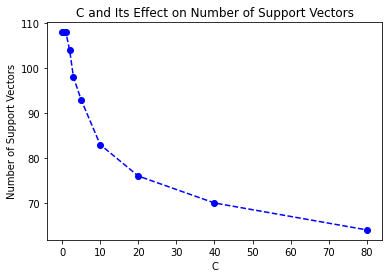

In [15]:
C = [0.1,0.2,0.3,0.5,1,2,3,5,10,20,40,80]
svs = plot_support_vectors(C)

# Hidden tests

**Now that you have a plot, check your earlier answer.**

## 4) Hyperparam Tuning

Compare  the  performance  of  four  different  kernel  functions:  linear (`linear`), polynomial (`poly`),  radial basis function (`rbf`), and `sigmoid`. Not only will you be changing the kernel function, you'll also be optimizing for the other hyperparams, including hyperpareters that are specific to a given kernel.

For each type of kernel functions, train your SVM classifiers using the training data and evaluate the resulting SVM classifer using testing data using accuracy, precision, recall and f-measure of the corresponding classification results.


### 4.1 Basic Hyperparameters

Write a function called `best_hyperparams` that when given a dictionary of params, runs a `GridSearchCV` on an SVC model using the training and test data.

Use a `cv` of 5.

This function should return the optimized classifier `clf`, from a grid search (this classifier will include a list of it's best parameters in the property `best_params_`).

You've used GridSearchCV in the last homework. As a reminder, see the documentation for [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html) for more info.

**Note**: While we are comparing each kernel individually in this case so we can inspect the results, you could also include the kernel itself as a hyperparameter in GridSearchCV (see below).

In [16]:
"""
Input:
    params_set: A dictionary of params to use for the grid search
    X_train: the training features
    y_train: the training labels
Output:
    The classifier with the best hyperparams, fit to the given training data and labels
"""
def best_hyperparams(param_set, X_train, y_train, cv=5):
    svc = SVC()
    clf = GridSearchCV(estimator=svc, param_grid=param_set, cv=cv)
    clf.fit(X_train, y_train)
    return clf

In [17]:
# Here are the value ranges for each of the params.
# We will tell you which of these to tune for which kernel.

# C is the regularization paramater we've discussed before
C = [0.1,0.2,0.5,1,2,3,5,10]

# degree is the degree of the polynomial used for the polynomial kernel
degree = [1,2,3]

# coef is the independent term in the kernel function, and is ony used by poly and sigmoid
coef0 = [0.01,0.02,0.1,0.2,1,2]

# gamma is the kernel coefficent used for rbf, poly, and sigmoid
gamma = [0.01,0.02,0.1,0.2,1,2]

In [18]:
from sklearn.metrics import classification_report

### Linear Kernel 
For the **linear** kernel, tune `C`.

In [19]:
params = [{
    "kernel":["linear"],
    "C":C
}]

model = best_hyperparams(params, X_train, y_train)
print(model.best_params_)
print(f'CV accuracy for best params: {model.best_score_}')


assert model.best_params_ == {'C': 3, 'kernel': 'linear'}

{'C': 3, 'kernel': 'linear'}
CV accuracy for best params: 0.7945652173913043


### Poly Kernel 
For the **polynomial** kernel, tune `C`, `degree` and `coef0`, where `degree` is the degree of the polynomial and `coef0` is the intercept.

In [20]:
params = [{
    "kernel":["poly"],
    "C":C,
    "degree":degree,
    "coef0":coef0
}]

model = best_hyperparams(params, X_train, y_train)
print(model.best_params_)
print(f'CV accuracy for best params: {model.best_score_}')

assert model.best_params_ == {'C': 5, 'coef0': 2, 'degree': 2, 'kernel': 'poly'}


{'C': 5, 'coef0': 2, 'degree': 2, 'kernel': 'poly'}
CV accuracy for best params: 0.8210144927536233


### RBF Kernel
For the **rbf** kernel, tune `C` and `gamma`.

In [21]:
params = [{
    "kernel":["rbf"],
    "C":C,
    "gamma":gamma
}]

model = best_hyperparams(params, X_train, y_train)
print(model.best_params_)
print(f'CV accuracy for best params: {model.best_score_}')

assert model.best_params_ == {'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}


{'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}
CV accuracy for best params: 0.7865942028985506


### Sigmoid Kernel 

For the **sigmoid** kernel, tune `C`, `coef0`, and `gamma`.

In [22]:
params = [{
    "kernel":["sigmoid"],
    "C":C,
    "coef0":coef0,
    "gamma":gamma
}]

model = best_hyperparams(params, X_train, y_train)
print(model.best_params_)
print(f'CV accuracy for best params: {model.best_score_}')

assert model.best_params_ == {'C': 10, 'coef0': 0.02, 'gamma': 0.01, 'kernel': 'sigmoid'}


{'C': 10, 'coef0': 0.02, 'gamma': 0.01, 'kernel': 'sigmoid'}
CV accuracy for best params: 0.6152173913043478


Which kernel performed best, and what does that say about the data?
The polynomial kernel performs the best among all the other kernals. This tells us that the data is nonlinear and inseparable data.

## Use the best Kernel and corresponding hyperparameters

Now, to select the best kernel and corresponding other hyperparameters, train a model on the training dataset, and evaluate it on the test dataset. The parameter has been set for your convenience.

You should utilize the `best_hyperparams()` function you implemented and [classification_report](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html) function.

In [23]:
params = [{
    "kernel":["linear", "poly", "rbf", "sigmoid"],
    "C":[3, 5, 10],
    "coef0":[0.02, 2],
    "degree": [2], 
    "gamma":[0.01, 0.1]
}]

model = predictions = report = None
model = best_hyperparams(params, X_train, y_train)
predictions = model.predict(X_test)
report = classification_report(y_test, predictions)
print(model.best_params_)
print(report)

{'C': 3, 'coef0': 0.02, 'degree': 2, 'gamma': 0.1, 'kernel': 'poly'}
              precision    recall  f1-score   support

           0       0.75      0.83      0.79        18
           1       0.84      0.76      0.80        21

    accuracy                           0.79        39
   macro avg       0.80      0.80      0.79        39
weighted avg       0.80      0.79      0.80        39



**Remember**: Make sure to complete all problems (.ipynb files) in this assignment. When you finish, double-check the submission instructions at the top of this file, and submit on JupyterHub.